# MTG Lightning

This notebook loads, inspects, and visualises 15-minute lightning flash accumulation fields from the MTG Lightning Imager over the pan-African domain. 

In [51]:
import numpy as np 
from netCDF4 import Dataset
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import cartopy.crs as ccrs                              
import cartopy.feature as cfeature                   
import cartopy.io.shapereader as shpreader

import warnings
warnings.filterwarnings("ignore")

In [20]:
path_LI = "/gws/ssde/j25b/swift/MTG_LI_pan_Africa"

In [21]:
year = "2025"
month = "06"
day = "21"
hour = "07"
minute = "15"

t0 = datetime(
    int(year), int(month), int(day),
    int(hour), int(minute)
)

date_str = t0.strftime("%Y%m%d")

file_path = (
    f"{path_LI}/{date_str}/"
    f"flash_accumulation_{t0:%Y%m%d%H%M%S}_15mins.nc"
)


In [44]:
ds = Dataset(file_path)

lat = ds.variables["latitude"][:]
lon = ds.variables["longitude"][:]

flash = ds.variables["flash_accumulation"][:]

In [46]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Accumulated flash_accumulation from MTG Lightning Imager
    institution: NCAS Leeds
    source: MTG Lightning Imager
    history: Created 2025-11-26T11:49:25.152066Z
    time_coverage_start: 2025-06-21T07:00:29Z
    time_coverage_end: 2025-06-21T07:14:59Z
    dimensions(sizes): y(4091), x(2645)
    variables(dimensions): float32 latitude(y, x), float32 longitude(y, x), float32 flash_accumulation(y, x)
    groups: 

In [47]:
print(lat.min(), lat.max())
print(lon.min(), lon.max())
print(flash.min(), flash.max())

-50.00085 inf
-24.97579 inf
0.0 72.558


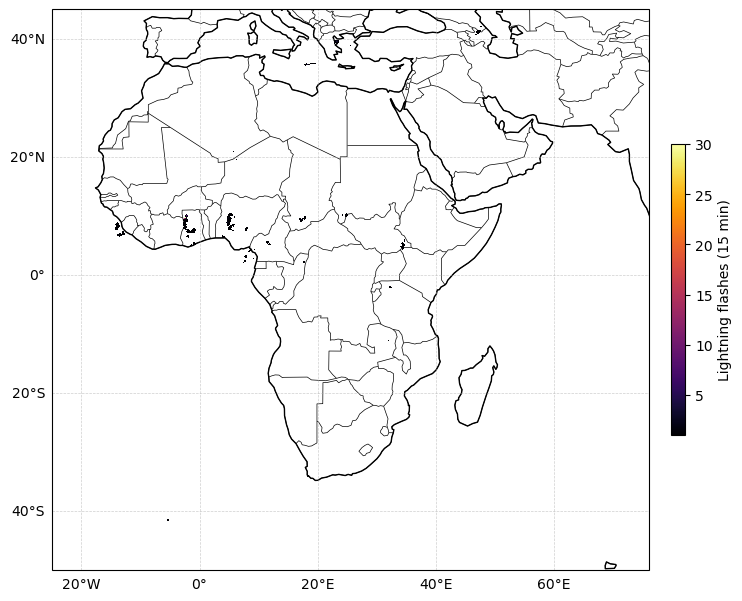

In [53]:
# Replace Inf with -999.99 for plotting
lon_plot = np.where(np.isfinite(lon), lon, -999.99)
lat_plot = np.where(np.isfinite(lat), lat, -999.99)

# Replace Inf with -999.99 to have an idea of the domain extent
lon_extent = np.where(np.isfinite(lon), lon, np.nan)
lat_extent = np.where(np.isfinite(lat), lat, np.nan)

# mask zero lightning for clarity
flash_plot = flash.copy()
flash_plot[flash_plot == 0] = np.nan

fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

extent = (
    np.nanmin(lon_extent),
    np.nanmax(lon_extent),
    np.nanmin(lat_extent),
    np.nanmax(lat_extent),
)

ax.set_extent(extent, crs=ccrs.PlateCarree())

# Base features
ax.add_feature(cfeature.LAND, facecolor="none", edgecolor="black", zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor="none", zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidth=0.5, zorder=1)

# Gridlines
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Plot lightning
im = ax.pcolormesh(
    lon_plot,
    lat_plot,
    flash_plot.data,
    transform=ccrs.PlateCarree(),
    cmap="inferno",
    vmin=1,
    vmax=30,
    zorder=2,
)

cbar = plt.colorbar(im, ax=ax, pad=0.03, shrink=0.3)
cbar.set_label("Lightning flashes (15 min)")
plt.tight_layout()
plt.show()